# Testing different pretrained NER models
https://medium.com/@b.terryjack/nlp-pretrained-named-entity-recognition-7caa5cd28d7b

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(seed=42)

# Reading a random data

In [2]:
# Save time requirement
name_all_list = []
time_all_list = []

# Open txt file
documents = []

with open('document.txt', 'r') as f:
    data = f.read()
    #print(data)
    documents.append(data)
    
documents[0].split('\n')
document = documents[0]
print(document)

Tesla was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. The company's name is a tribute to inventor and electrical engineer Nikola Tesla. In February 2004, via a $6.5 million investment, Elon Musk became the largest shareholder of the company. He has served as CEO since 2008. According to Musk, the purpose of Tesla is to help expedite the move to sustainable transport and energy, obtained through electric vehicles and solar power. Tesla began production of its first car model, the Roadster sports car, in 2009. This was followed by the Model S sedan in 2012, the Model X SUV in 2015, the Model 3 sedan in 2017, and the Model Y crossover in 2020. The Model 3 is the all-time best-selling plug-in electric car worldwide, and, in June 2021, became the first electric car to sell 1 million units globally. Tesla's global sales were 936,222 cars in 2021, a 87% increase over the previous year, and cumulative sales totaled 3 million cars as of August 2022. In Octo

In [3]:
words = documents.copy()
words = words[0].replace('.','')

words = ' . '.join(words.split('.'))
words = ' ,'.join(words.split(','))
words = words.split(' ')
print(words)

import pandas as pd

df = pd.DataFrame(words, columns=['words'])
df.to_csv('to_create_label.csv')

print(len(words))

['Tesla', 'was', 'incorporated', 'in', 'July', '2003', 'by', 'Martin', 'Eberhard', 'and', 'Marc', 'Tarpenning', 'as', 'Tesla', 'Motors', 'The', "company's", 'name', 'is', 'a', 'tribute', 'to', 'inventor', 'and', 'electrical', 'engineer', 'Nikola', 'Tesla', 'In', 'February', '2004', ',', 'via', 'a', '$65', 'million', 'investment', ',', 'Elon', 'Musk', 'became', 'the', 'largest', 'shareholder', 'of', 'the', 'company', 'He', 'has', 'served', 'as', 'CEO', 'since', '2008', 'According', 'to', 'Musk', ',', 'the', 'purpose', 'of', 'Tesla', 'is', 'to', 'help', 'expedite', 'the', 'move', 'to', 'sustainable', 'transport', 'and', 'energy', ',', 'obtained', 'through', 'electric', 'vehicles', 'and', 'solar', 'power', 'Tesla', 'began', 'production', 'of', 'its', 'first', 'car', 'model', ',', 'the', 'Roadster', 'sports', 'car', ',', 'in', '2009', 'This', 'was', 'followed', 'by', 'the', 'Model', 'S', 'sedan', 'in', '2012', ',', 'the', 'Model', 'X', 'SUV', 'in', '2015', ',', 'the', 'Model', '3', 'sedan'

In [4]:
document

"Tesla was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. The company's name is a tribute to inventor and electrical engineer Nikola Tesla. In February 2004, via a $6.5 million investment, Elon Musk became the largest shareholder of the company. He has served as CEO since 2008. According to Musk, the purpose of Tesla is to help expedite the move to sustainable transport and energy, obtained through electric vehicles and solar power. Tesla began production of its first car model, the Roadster sports car, in 2009. This was followed by the Model S sedan in 2012, the Model X SUV in 2015, the Model 3 sedan in 2017, and the Model Y crossover in 2020. The Model 3 is the all-time best-selling plug-in electric car worldwide, and, in June 2021, became the first electric car to sell 1 million units globally. Tesla's global sales were 936,222 cars in 2021, a 87% increase over the previous year, and cumulative sales totaled 3 million cars as of August 2022. In Oct

# GATE API - ANNIE

Got a limit when calling the API.

It is extremely slow and not feasible for any use.

In [5]:
import requests
import json

url = "https://cloud-api.gate.ac.uk/process-document/annie-named-entity-recognizer"
headers = {'Content-Type': 'text/plain'}

name_all_list.append('GATE API - ANNIE')

time_list = []

for _ in range(1):
    start = time.time()
    response = requests.post(url, data=document, headers=headers).json()
    output = json.dumps(response, indent=1)
    end = time.time()
    time_all_list.append(end - start)

print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')

keys = list(response['entities'].keys())
for key in keys:
    
    print('\n############## ' + key + ' ##############')
    temp = response['entities'][key]
    
    for i in range(len(temp)):
        ent = temp[i]
        indices = ent['indices']
        start = indices[0]
        end = indices[1]
        
        word = document[start:end]
        
        try:
            ruleFinal = ent['ruleFinal']
        except:
            ruleFinal = ent['NMRule']
        
        try:
            if key == 'Date': x = ent['kind']
            elif key == 'Location': x = ent['locType']
            elif key == 'Organization': x = ent['orgType']     
            elif key == 'Person': x = ent['gender']
        except:
            x = 'Unknown'
                
        print(word, '-', ruleFinal, '-', x)


Time Required:1.274s


############## Date ##############
July 2003 - DateOnlyFinal - date
February 2004 - DateOnlyFinal - date
2008 - YearOnlyFinal - date
2009 - DateOnlyFinal - date
2012 - DateOnlyFinal - date
2015 - DateOnlyFinal - date
2017 - DateOnlyFinal - date
2020 - DateOnlyFinal - date
June 2021 - DateOnlyFinal - date
2021 - DateOnlyFinal - date
previous year - DateOnlyFinal - date
August 2022 - DateOnlyFinal - date
October 2021 - DateOnlyFinal - date

############## Location ##############
U.S. - LocFinal - country

############## Organization ##############
Tesla - Unknown - Unknown
Tesla Motors - OrgFinal - company
Tesla - Unknown - Unknown
Tesla - Unknown - Unknown
Tesla - Unknown - Unknown
Tesla - Unknown - Unknown

############## Person ##############
Martin Eberhard - PersonFinal - male
Marc Tarpenning - PersonFinal - male
Nikola Tesla - PersonFinal - female


# NLTK
Department of Computer and Information Science at the University of Pennsylvania

Very fast. However, it does not record numbers.

In [6]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

name_all_list.append('NLTK')

start = time.time()
tokens = nltk.word_tokenize(document)
pos_tags = nltk.pos_tag(tokens)
chunks = nltk.ne_chunk(pos_tags)
end = time.time()
time_all_list.append(end - start)

print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')

for chunk in chunks:
   if hasattr(chunk, 'label'):
       print(' '.join(c[0] for c in chunk), chunk.label())


Time Required:0.752s


Tesla PERSON
Martin Eberhard PERSON
Marc Tarpenning PERSON
Tesla Motors ORGANIZATION
Nikola Tesla PERSON
Elon Musk PERSON
CEO ORGANIZATION
Musk GPE
Tesla GPE
Tesla PERSON
Roadster ORGANIZATION
Model ORGANIZATION
Model ORGANIZATION
Model ORGANIZATION
Tesla PERSON
Tesla PERSON
U.S. GPE


# SpaCy
Explosion

In [7]:
#!python3 -m spacy download en_core_web_lg
import spacy
import spacy_transformers

def print_ent(output):
    for ent in output:
       print(ent.text, '-', ent.label_)
    return None
    
model_list = [
              'en_core_web_sm', 
              'en_core_web_md', 
              'en_core_web_lg',
              'en_core_web_trf', #import spacy_transformers
             ]
    
for model in model_list:    

    print('\n############## '+ model + ' ##############')
    nlp = spacy.load(model)

    name_all_list.append('SpaCy - ' + model)

    start = time.time()
    output = nlp(document).ents
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')
    print_ent(output)


############## en_core_web_sm ##############

Time Required:0.09s

July 2003 - DATE
Martin Eberhard - PERSON
Tesla Motors - ORG
February 2004 - DATE
$6.5 million - MONEY
Elon Musk - PERSON
2008 - DATE
Musk - PERSON
Tesla - ORG
first - ORDINAL
2009 - DATE
Model S - PRODUCT
2012 - DATE
Model X SUV - PRODUCT
2015 - DATE
2017 - DATE
2020 - DATE
June 2021 - DATE
first - ORDINAL
1 million - CARDINAL
936,222 - CARDINAL
2021 - DATE
87% - PERCENT
the previous year - DATE
3 million - CARDINAL
August 2022 - DATE
October 2021 - DATE
Tesla - ORG
$1 trillion - MONEY
sixth - ORDINAL
U.S. - GPE

############## en_core_web_md ##############

Time Required:0.038s

Tesla - ORG
July 2003 - DATE
Martin Eberhard - PERSON
Marc Tarpenning - PERSON
Tesla Motors - ORG
Nikola Tesla - PERSON
February 2004 - DATE
$6.5 million - MONEY
Elon Musk - PERSON
2008 - DATE
Musk - ORG
Tesla - ORG
Tesla - ORG
first - ORDINAL
2009 - DATE
Model S - PRODUCT
2012 - DATE
Model X SUV - PRODUCT
2015 - DATE
Model 3 - PRODUCT
2017 -

# Flair
Zalando Research

In [8]:
#!pip3 install flair
# https://huggingface.co/flair
from flair.models import SequenceTagger
from flair.data import Sentence

model_list = [
                'ner',

                'flair/ner-english',
                'flair/ner-english-fast',
                'flair/ner-english-large',

                #'flair/ner-english-ontonotes-fast',
                #'flair/ner-english-ontonotes-large',
            ]

for model in model_list:
    print('\n############## ' + model + ' ##############')
    s = Sentence(document)
    nlp = SequenceTagger.load(model)
    
    name_all_list.append('Flair - ' + model.replace('flair/',''))

    start = time.time()
    nlp.predict(s)
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')
    
    # iterate over each entity
    for entity in s.get_spans('ner'):

        # print entity text, start_position and end_position
        print(str(entity.text) + ' - '+ 
              str(entity.get_label('ner').value) + ' - '+ 
              str(np.round(entity.get_label('ner').score, 3)))
        
    # entity.start_position
    # entity.end_position


############## ner ##############
2022-09-27 09:57:20,072 loading file C:\Users\WeiYanPEH\.flair\models\ner-english\4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
2022-09-27 09:57:40,115 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>

Time Required:4.85s

Tesla - ORG - 1.0
Martin Eberhard - PER - 0.963
Marc Tarpenning - PER - 0.995
Tesla Motors - ORG - 0.998
Nikola Tesla - ORG - 0.618
Elon Musk - ORG - 0.985
Musk - ORG - 0.955
Tesla - ORG - 0.997
Tesla - ORG - 0.999
Model S - MISC - 0.511
Model X SUV - MISC - 0.674
Model 3 - MISC - 0.804
Model Y - MISC - 0.617
Model 3 - MISC - 0.803
Tesla - ORG - 0.997
Tesla - ORG - 1.0
U.S. - LOC - 0.999

############## flair/ner-english ##############
2022-09-27 09:57:46,143 loading file C:\Users\WeiYanPEH\.flair\models\ner-e

# AllenNLP - ELMo
Allen Institute for AI

In [9]:
#!pip install -U allennlp
#https://medium.com/geekculture/how-to-use-allennlps-pretrained-ner-model-in-2021-b60335904fc3
# Do not use old ELMo model

import torch
from torch.nn import functional as F
from allennlp.predictors import Predictor

model_path = ('ELMo/ner-model-2020.02.10.tar.gz')
predictor = Predictor.from_path(model_path)

print('\n############## ELMo ##############') 
name_all_list.append('ELMo - AllenNLP')

start = time.time()
results = predictor.predict(sentence=document)
end = time.time()
time_all_list.append(end - start)

print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')

zipped = zip(results['words'], results['tags'], results['logits'])
for word, tag, logit in zipped:
    
    if tag != 'O':
        # convert logit score to torch array
        logit = torch.from_numpy(np.array(logit))
        logit = np.abs(logit)

        # get probabilities using softmax from logit score 
        # and convert it to numpy array
        prob = np.max(F.softmax(logit, dim = -1).numpy())
        prob = np.round(prob, 3)

        print(word, '-', tag, '-', prob)

error loading _jsonnet (this is expected on Windows), treating C:\Users\WEIYAN~1\AppData\Local\Temp\tmpp8orln8e\config.json as plain json



############## ELMo ##############

Time Required:3.688s

Tesla - U-ORG - 0.997
Martin - B-PER - 0.999
Eberhard - L-PER - 1.0
Marc - B-PER - 0.999
Tarpenning - L-PER - 1.0
Tesla - B-ORG - 0.994
Motors - L-ORG - 0.994
Nikola - B-PER - 0.952
Tesla - L-PER - 0.996
Elon - B-PER - 0.999
Musk - L-PER - 1.0
Musk - U-PER - 0.998
Tesla - U-ORG - 0.95
Tesla - U-ORG - 0.99
Roadster - U-MISC - 0.991
Model - B-MISC - 0.99
S - L-MISC - 0.99
Model - B-MISC - 0.983
X - I-MISC - 0.994
SUV - L-MISC - 0.848
Model - B-MISC - 0.991
3 - L-MISC - 0.986
Model - B-MISC - 0.985
Y - L-MISC - 0.995
Model - B-MISC - 0.986
3 - L-MISC - 0.95
Tesla - U-ORG - 0.988
Tesla - U-ORG - 0.989
U.S. - U-LOC - 1.0


# Stanford NLP
Stanford NLP Group

In [10]:
#!pip3 install nltk==3.2.4
#!wget http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
#!unzip stanford-ner-2015-04-20.zip
#http://www.java2s.com/Code/Jar/s/Downloadstanfordnerjar.htm
from nltk.tag.stanford import StanfordNERTagger

def print_output(st, document):
    for word, tag in st.tag(document.split()):
        if tag != 'O':
            print(word, tag)
    return None

model_list = [
              'english.all.3class.distsim.crf.ser',
              'english.conll.4class.distsim.crf.ser',
              'english.muc.7class.distsim.crf.ser'
             ]

for model in model_list:
    print('\n############## ' + model + ' ##############') 

    name_all_list.append('Stanford - ' + model.replace('.distsim.crf.ser',''))

    nlp = StanfordNERTagger('Stanford Model/' + model,
                            'Stanford Model/stanford-ner.jar', 
                            encoding='utf-8')
    
    start = time.time()
    print_output(nlp, document)
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')


############## english.all.3class.distsim.crf.ser ##############
Tesla PERSON
Martin PERSON
Eberhard PERSON
Marc PERSON
Tarpenning PERSON
Tesla ORGANIZATION
Motors ORGANIZATION
Nikola PERSON
Tesla PERSON
Elon ORGANIZATION
Musk ORGANIZATION
Musk PERSON
Tesla LOCATION
Tesla PERSON
Tesla PERSON

Time Required:3.593s


############## english.conll.4class.distsim.crf.ser ##############
Tesla PERSON
Martin PERSON
Eberhard PERSON
Marc PERSON
Tarpenning PERSON
Tesla ORGANIZATION
Motors ORGANIZATION
Nikola PERSON
Tesla PERSON
Elon PERSON
Musk PERSON
Musk PERSON
Tesla LOCATION
Tesla LOCATION
Roadster MISC
SUV ORGANIZATION
Model ORGANIZATION
Model ORGANIZATION
Tesla ORGANIZATION

Time Required:0.858s


############## english.muc.7class.distsim.crf.ser ##############
July DATE
2003 DATE
Martin ORGANIZATION
Eberhard ORGANIZATION
Marc PERSON
Tarpenning PERSON
Tesla ORGANIZATION
Motors ORGANIZATION
Nikola PERSON
Tesla PERSON
February DATE
2004 DATE
$ MONEY
6.5 MONEY
million MONEY
Elon LOCATION
Musk 

# Huggingface BERT
Open Source

In [11]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import BertTokenizerFast, BertForTokenClassification
from transformers import pipeline
#https://huggingface.co/dslim

model_list = [
                'dslim/bert-base-NER-uncased',
                'dslim/bert-base-NER',
                'dslim/bert-large-NER',

                'Jean-Baptiste/roberta-large-ner-english',
                'Jean-Baptiste/camembert-ner', # French though
                'Jean-Baptiste/camembert-ner-with-dates', # French though

                'tner/roberta-large-wnut2017',
                'tner/roberta-large-conll2003',
            ]

for path in model_list:
    print('\n############## ' + path + ' ##############')
    
    #tokenizer = BertTokenizerFast.from_pretrained(path)
    #model = BertForTokenClassification.from_pretrained(path)

    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModelForTokenClassification.from_pretrained(path) 
    
    nlp = pipeline("ner", 
                   model=model, 
                   tokenizer=tokenizer, 
                   grouped_entities=True,
                   #grouped_entities=False,
                  )

    name_all_list.append('HuggingFace - ' + 
                         path.replace('dslim/','').replace('Jean-Baptiste/','').replace('tner/',''))

    start = time.time()
    ner_results = nlp(document)
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's\n')
    
    for ner in ner_results:
        word = ner['word']
        prob = np.round(ner['score'], 3)
        #ent = ner['entity']
        ent = ner['entity_group']
    
        print(word, '-', ent, '-', prob)


############## dslim/bert-base-NER-uncased ##############

Time Required:0.449s

tesla - ORG - 0.784
martin eberhard - PER - 0.996
marc tarpenning - PER - 0.997
tesla motors - ORG - 0.986
nikola tesla - PER - 0.991
el - PER - 0.993
##on musk - PER - 0.98
musk - PER - 0.981
tesla - ORG - 0.92
tesla - ORG - 0.889
##ter - MISC - 0.618
model s - MISC - 0.947
model x suv - MISC - 0.896
model 3 - MISC - 0.937
model y crossover - MISC - 0.894
model 3 - MISC - 0.96
tesla - ORG - 0.981
tesla - ORG - 0.981
u. s - LOC - 0.923

############## dslim/bert-base-NER ##############

Time Required:0.411s

Tesla - ORG - 0.974
Martin Eberhard - PER - 0.998
Marc Tarp - PER - 0.99
Tesla Motors - ORG - 0.996
Nikola Tesla - PER - 0.999
Elon Musk - ORG - 0.961
Mu - PER - 0.991
##sk - PER - 0.523
Tesla - ORG - 0.709
Tesla - ORG - 0.994
Roadster - MISC - 0.986
Model S - MISC - 0.998
Model X - MISC - 0.997
Model 3 - MISC - 0.997
Model Y - MISC - 0.997
Model 3 - MISC - 0.997
Tesla - ORG - 0.996
Tesla - ORG - 0.99

# Check Prediction Time

In [12]:
df = pd.DataFrame(
    {'Model': name_all_list,
     'Time': time_all_list
    })

In [13]:
df

,Model,Time
0,GATE API - ANNIE,1.273638
1,NLTK,0.752478
2,SpaCy - en_core_web_sm,0.090438
3,SpaCy - en_core_web_md,0.037840
4,SpaCy - en_core_web_lg,0.041456
5,SpaCy - en_core_web_trf,1.231483
6,Flair - ner,4.850095
7,Flair - ner-english,4.811599
8,Flair - ner-english-fast,1.253726
9,Flair - ner-english-large,1.587667


Text(0.5, 1.0, 'Time required to extract NER')

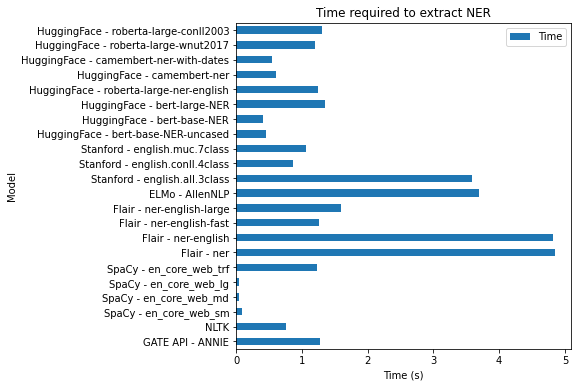

In [16]:
df.plot.barh(x='Model', y='Time', rot=0, figsize=(6,6))
plt.xlabel('Time (s)')
plt.title('Time required to extract NER')

# HuggingFace ALBERT
Open source
Only output 0/1

In [ ]:
from transformers import AlbertTokenizer, TFAlbertForTokenClassification
import tensorflow as tf
from transformers import pipeline

model_list = [
              'tiny-albert',
              'tf-albert-base-v2',
              #'albert-base-v2-squad2',
              #'albert-base-v2-imdb',
             ]

for path in model_list:
    
    print('\n############## ' + path + ' ##############')

    tokenizer = AlbertTokenizer.from_pretrained("vumichien/" + path)
    model = TFAlbertForTokenClassification.from_pretrained("vumichien/" + path)

    #tokenizer = AutoTokenizer.from_pretrained("vumichien/" + path)
    #model = AutoModelForTokenClassification.from_pretrained("vumichien/" + path)
    
    nlp = pipeline("ner",
                   model=model,
                   tokenizer=tokenizer, 
                   grouped_entities=True,
                   #grouped_entities=False
                  )
    
    name_all_list.append('HuggingFace - ALBERT - ' + path)

    start = time.time()
    ner_results = nlp(document)
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's')

    for ner in ner_results:
        word = ner['word']
        prob = np.round(ner['score'], 3)
        #ent = ner['entity']
        ent = ner['entity_group']
        
        if ent != 'LABEL_0': 
            print(word, '-', ent, '-', prob)

# Huggingface XLNET
Open source
Only output 0/1

In [ ]:
from transformers import XLNetTokenizer, TFXLNetForTokenClassification
import tensorflow as tf
from transformers import pipeline


model_list = [
              'xlnet-base-cased',
              'xlnet-large-cased'
             ]

for path in model_list:
    
    print('\n############## ' + path + ' ##############')

    tokenizer = XLNetTokenizer.from_pretrained(path)
    model = TFXLNetForTokenClassification.from_pretrained(path)

    #tokenizer = AutoTokenizer.from_pretrained("vumichien/" + path)
    #model = AutoModelForTokenClassification.from_pretrained("vumichien/" + path)
    
    nlp = pipeline("ner",
                   model=model,
                   tokenizer=tokenizer, 
                   #grouped_entities=True,
                   grouped_entities=False
                  )

    name_all_list.append('HuggingFace - XLNET - ' + path)

    start = time.time()
    ner_results = nlp(document)
    end = time.time()
    time_all_list.append(end - start)

    print('\nTime Required:' + str(np.round(end - start, 3)) + 's')

    for ner in ner_results:
        word = ner['word']
        prob = np.round(ner['score'], 3)
        ent = ner['entity']
        #ent = ner['entity_group']
        
        if ent != 'LABEL_0':
            print(word, '-', ent, '-', prob)

# Polyglot (Does not work on Windows)

In [ ]:
pip install polyglot

In [ ]:
#!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
#!polyglot download embeddings2.en ner2.en
from polyglot.text import Text
output = Text(document).entities
print(output)

# Deep Pavlov (Does not work on Windows)

In [ ]:
#https://stackoverflow.com/questions/58207216/modulenotfounderror-no-module-named-deeppavlov-in-jupyter-notebook
#!pip3 install deeppavlov
#!python3 -m deeppavlov install ner_ontonotes
#import sys
#!{sys.executable} -m pip install -U deeppavlov

from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner.ner_ontonotes, download=True)
deeppavlov_ner([sentence])